In [1]:
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,TensorDataset,Dataset
from torch.nn.modules.conv import Conv2d 
import torch.nn.functional as F
from torch.nn.modules.batchnorm import BatchNorm2d
import time
import numpy as np
import matplotlib.pyplot as plt
import os
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

In [2]:
class Net(nn.Module):
    def __init__(self):	
        super(Net, self).__init__()
        self.conv1=Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3,3), bias=False)
        self.bn1=BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        
        self.conv2=Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1,1), bias=False)
        self.bn2=BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        
        self.conv3=Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1,1),bias=False)
        self.bn3=BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        
        self.conv4=Conv2d(256, 64, kernel_size=(3, 3), stride=(1, 1),padding=(1,1), bias=False)
        self.bn4=BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        
        self.conv5=Conv2d(64, 16, kernel_size=(3, 3), stride=(1, 1),padding=(1,1), bias=False)
        self.bn5=BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        
        self.conv6=Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1),padding=(1,1), bias=False)
        
    def forward(self, x):
        x = self.conv1(x)
        x=self.bn1(x)
        x = F.relu(x)
        
        x=self.conv2(x)
        x=F.max_pool2d(x, 2)
        x=self.bn2(x)
        x = F.relu(x)
        
        x=self.conv3(x)
        x=F.max_pool2d(x, 2)
        x=self.bn3(x)
        x = F.relu(x)
        
        x=self.conv4(x)
        x=F.max_pool2d(x, 2)
        x=self.bn4(x)
        x = F.relu(x)
        
        x=self.conv5(x)
        x=F.max_pool2d(x, 2)
        x=self.bn5(x)
        x = F.relu(x)
        
        
        x=self.conv6(x)
        return x

In [3]:
model = Net() 
model=model.to(device)
# print(model)

In [4]:
shapeness1=np.load('/home/chase/Boyka/Lyu/data/shapeness/origin/rainfall_img256_sharpness1_unit8.npz')
data=shapeness1['data'][:,-1]
label=shapeness1['rainfall']
# data=np.load('/home/chase/Boyka/Lyu/data/rainfall/reg/data_reg_2000.npy')
data=np.expand_dims(data,axis=1)
# data=torch.from_numpy(data)
data=torch.FloatTensor(data)
# print(type(data[0][0][0]))
# print(data[0][0][0])
# label=np.load('/home/chase/Boyka/Lyu/data/rainfall/reg/label_reg_2000.npy')
print(label.shape)
label=np.expand_dims(label,axis=1)
# label=torch.from_numpy(label)
label=torch.FloatTensor(label)
# print(label[0][0][0])
# print(data.shape,label.shape)
train_x=data[:-20]
test_x=data[-20:]
train_y=label[:-20]
test_y=label[-20:]
print(data.shape,label.shape)

(100, 8, 8)
torch.Size([100, 1, 256, 256]) torch.Size([100, 1, 8, 8])


In [5]:
train_dataset = TensorDataset(train_x,train_y)
test_dataset = TensorDataset(test_x,test_y)
train_loader=DataLoader(dataset=train_dataset,batch_size=32,shuffle=True,num_workers=2)
test_loader=DataLoader(dataset=test_dataset,batch_size=32,shuffle=True,num_workers=2)
train_data_size=len(train_loader)
valid_data_size=len(test_loader)

In [6]:
model=torch.load('models/best_model.pt')

In [7]:
model.to(device)

Net(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(64, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
)

In [8]:
label=[]
pre=[]
with torch.no_grad():
    model.eval()
    for j, (inputs, labels) in enumerate(test_loader):
        label.extend(labels.numpy().tolist())
#         label+=labels.numpy()
        inputs = inputs.to(device)
#         labels = labels.to(device)
        outputs = model(inputs)
        pre.extend(outputs.to("cpu").numpy().tolist())
#         pre+=outputs.to("cpu").numpy()



/home/chase/.local/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [9]:
pre=np.squeeze(pre)
label=np.squeeze(label)
np.array(pre).shape

(20, 8, 8)

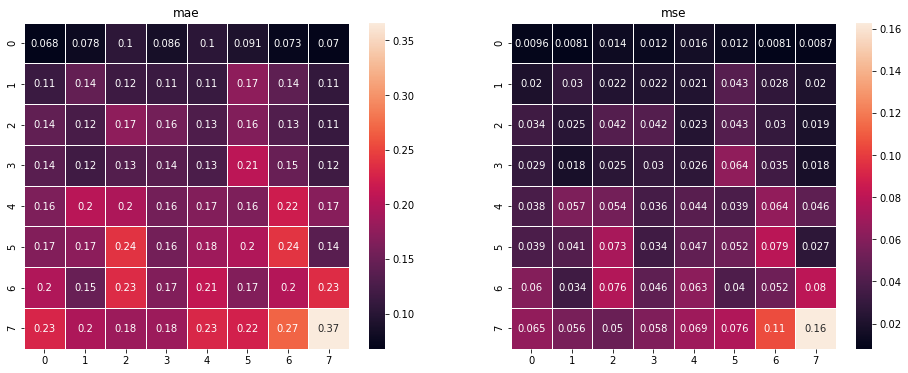

In [10]:
# np.save('label_20.npy',label)
# np.save('pre_20.npy',pre)
mae=np.mean(np.abs(pre-label),axis=0)
mse=np.mean(np.square(pre-label),axis=0)
import seaborn as sns
plt.figure(figsize=(16,6))
ax1 =plt.subplot(121)
ax1.set_title('mae')
h=sns.heatmap(mae, annot=True,linewidths=0.5)  

ax2=plt.subplot(122)
ax2.set_title('mse')
h=sns.heatmap(mse, annot=True,linewidths=0.5)  

# ax1=sns.heatmap(mse, annot=True,linewidths=0.5)  
# fig=ax1.get_figure()
# ax2=sns.heatmap(mse, annot=True,linewidths=0.5)  
# fig=ax1.get_figure()
# plt.legend()
# plt.show()
plt.savefig('../shape1.png')

No handles with labels found to put in legend.


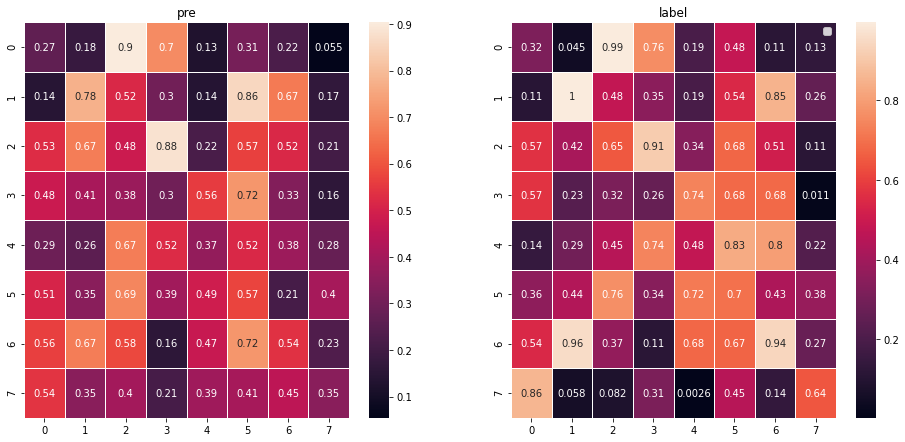

In [11]:

plt.figure(figsize=(16,16))
ax1 =plt.subplot(221)
ax1.set_title('pre')
h=sns.heatmap(pre[0], annot=True,linewidths=0.5)  

ax2=plt.subplot(222)
ax2.set_title('label')
h=sns.heatmap(label[0], annot=True,linewidths=0.5)  

plt.legend()
# plt.show()

# plt.savefig('../shape1.png')

In [12]:
data_max=np.max(label) if np.max(label)>np.max(pre) else np.max(pre)
data_min=np.min(label) if np.min(label)<np.min(pre) else np.min(pre)
print(data_max,data_min)

1.173570156097412 -0.036077726632356644


No handles with labels found to put in legend.


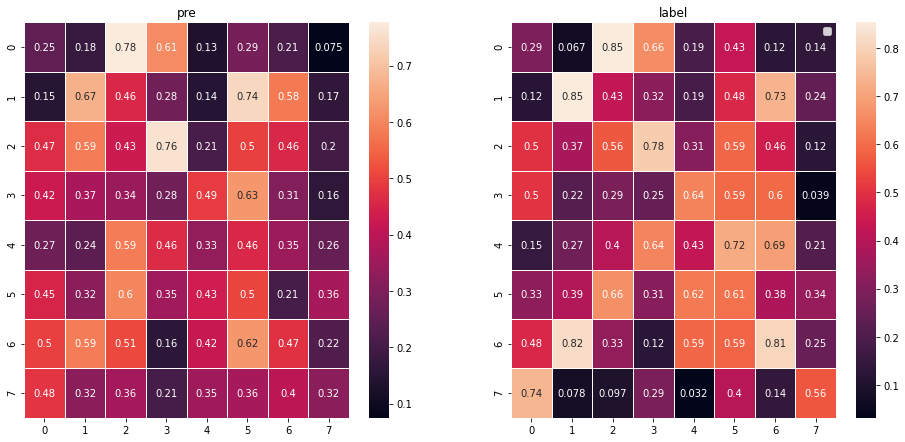

In [13]:
import seaborn as sns
plt.figure(figsize=(16,16))
ax1 =plt.subplot(221)
ax1.set_title('pre')
h=sns.heatmap((pre[0]-data_min)/(data_max-data_min), annot=True,linewidths=0.5)  

ax2=plt.subplot(222)
ax2.set_title('label')
h=sns.heatmap((label[0]-data_min)/(data_max-data_min), annot=True,linewidths=0.5)  

plt.legend()
plt.show()